# Proyecto
* Karen Fuentes
* Marco Ramirez
* Jenifer Arce

# Sección 1. Entendimiento del negocio y enfoque analítico


## Generalidades

|||
|-|-|
| **Oportunidad/problema Negocio**  |Cómo detectar noticias falsas en la política con el fin de evitar la polarización y manipulación de la opinión pública.|
| **Objetivos** |Desarrollar un modelo de aprendizaje automático capaz de identificar noticias falsas en política con alta exactitud y precisión.|
| **Criterios de éxito** |  Un alto desempeño en métricas de precisión, recall y F1-score, así como minimizar errores de tipo I y II.|
|**Organización y rol beneficiados**|El gobierno nacional,la comunidad internacional, ciudadanos y organismos electorales se verán beneficiados al tener acceso a información confiable para la toma de decisiones. |

## Impacto y enfoque analítico

La implementación de un modelo de detección de noticias falsas en Colombia y en latinoamétrica tendría un impacto sobre la polarización política y manipulación de la opinión pública, así como aumentar la confianza en las instituciones del país y en general mejorar la calidad de la información disponible para los ciudadanos.

De acuerdo con datos de Statista (2024) el 49% de personas en Latinoamérica leen por lo menos una noticia falsa al día. Por lo tanto, la realización del modelo serviría para distintos tipos de usuarios, que pueden ser ciudadanos que quieran verificar la veracidad de las noticias, o empresas que necesiten analizar muchas noticias día al día.

La categoría del análisis a realizar es **predictiva** ya que buscamos predecir si una noticia es falsa o verdadera con base a su título y descripción. El tipo de aprendizaje es **supervisado** ya que el modelo aprende de un conjunto de datos de noticias que ya estan etiquetadas como falsas o verdaderas. La tarea de aprendizaje es de **clasificación binaria** basada en si es una noticia verdadera (1) o falsa (0). Las técnicas y algoritmos a utilizar son **preprocesamiento de datos (tokenización, lematización y vectorización)** al igual que algoritmos como **Naive Bayes, Random Forest, entre otros**.

# Clonar repo para los archivos

In [1]:
!git clone https://github.com/jennn-arce/proy1BI.git

fatal: destination path 'proy1BI' already exists and is not an empty directory.


## Usar esta línea cada vez que necesiten hacer pull

In [2]:
#%cd /content/proy1BI
# %ls
# !git pull

# 0. Carga de datos y librerías

In [3]:
!pip install contractions
!pip install nltk

 # Instalación de librerias
import pandas as pd
import numpy as np
import sys
!{sys.executable} -m pip install pandas-profiling

import re, string, unicodedata

import contractions


import inflect

import nltk
nltk.download('punkt_tab')
from nltk import word_tokenize, sent_tokenize, PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('spanish')
wpt = nltk.WordPunctTokenizer()
ps = PorterStemmer()

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix


from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 0.0.dev0 requires visions[type_image_path]<0.8.0,>=0.7.5, but you have visions 0.7.4 which is incompatible.


  Using cached visions-0.7.4-py3-none-any.whl.metadata (5.9 kB)
Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.6
    Uninstalling visions-0.7.6:
      Successfully uninstalled visions-0.7.6


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\jenni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jenni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# df = pd.read_csv('/content/proy1BI/fake_news_spanish.csv', encoding='utf-8', sep = ";")
# data_test = pd.read_csv('/content/proy1BI/fake_news_test.csv', encoding='utf-8', sep = ";")

In [5]:
df = pd.read_csv('fake_news_spanish.csv', encoding='utf-8', sep = ";")
data_test = pd.read_csv('fake_news_test.csv', encoding='utf-8', sep = ";")

In [6]:
df.head(1)

,ID,Label,Titulo,Descripcion,Fecha
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023


In [7]:
print('data spanish', df.shape)
print('data test', df.shape)

data spanish (57063, 5)
data test (57063, 5)


#Sección 2. Entendimiento y preparación de los datos

# 2.1 Entendimiento de datos

In [8]:
df.dtypes

ID             object
Label           int64
Titulo         object
Descripcion    object
Fecha          object
dtype: object

Identificamos que las columnas de tipo object no tienen el formato correcto, estas se cambiaran más adelante.

In [9]:
df.head(10)

,ID,Label,Titulo,Descripcion,Fecha
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018
5,ID,1,"El PNV consolida su mayoría, el PSE salva los ...",Los nacionalistas consiguen las alcaldías de B...,26/05/2019
6,ID,0,El exconsejero Núria Marín pide el indulto en ...,Sus familiares aluden a su honestidad e integr...,16/09/2022
7,ID,1,La Fiscalía pide prisión incondicional para lo...,Suprime el delito de rebelión que les imputó i...,26/09/2019
8,ID,1,"José Manuel Pérez Tornero, el creador de la te...",El futuro presidente de RTVE es licenciado en ...,25/02/2021
9,ID,0,La 'Ayusización' del BNG: Santiago Abascal ins...,Pablo Santiago Abascal planea vivir de las ren...,10/05/2021


In [10]:
data_test.head(5)

,ID,Titulo,Descripcion,Fecha
0,ID,La mesa del congreso censura un encuentro inte...,"Portavoces de Ciudadanos, PNV, UPN, PSOE, Unid...",30/10/2018
1,ID,La brecha digital que dificulta el acceso de a...,No es la primera vez que los ciudadanos vulner...,15/03/2023
2,ID,PP apremia al EQUO a presentar una propuesta d...,El partido morado reprocha que los socialistas...,01/07/2019
3,ID,De soberano garante de la democracia a rey cor...,"La renuncia de Felipe VI a su herencia, proced...",16/03/2020
4,ID,El Gobierno aprobará este martes detraer los b...,El Ejecutivo también prorrogará la suspensión ...,13/09/2021


In [11]:
#descomentarlo cuando se vaya a entregar
!pip install ydata-profiling
from ydata_profiling import ProfileReport

perfil = ProfileReport(df, title="Perfilamiento de Datos", explorative=True)
perfil.to_notebook_iframe()

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


  Using cached visions-0.7.6-py3-none-any.whl.metadata (11 kB)
Using cached visions-0.7.6-py3-none-any.whl (104 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

* Número de variables: 5
* observaciones: 57063
* celdas faltantes 35339
* no hay duplicados
* lablel -> 33158 en 1 , 23905 en 0
* 16 titulos faltantes, 90.5% únicos
* 0 descripciones faltantes, 87% únicos
* faltan 61.9%fechas



### Clasifcación de variables

In [12]:
df.describe()

,Label
count,57063.000000
mean,0.581077
std,0.493387
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


Se puede evidenciar que de la variable **label** el valor mínimo es 0 y el máximo es 1. La media es de 0.581, es decir que el 58.1% de las noticias son verdaderas. Esto también se evidencia con la mediana ya que su valor es de 1.

Adicionalmente la variable **ID** por el momento es categorica ya que todos los valores son 'ID' y hay que hacer el corregimiento de esta variable.

### Variables de texto

Las dos variables de texto identificadas son **titulo** y **descripción**. Se observa que las palabras más frecuentes son stopwords como "de", "los", "que", "la", "del", "y", "a", "por", "para". Estas serán eliminadas en la fase de preprocesamiento con **lematización**. Así mismo evicenciamos palabras con tíldes, mucha puntuación y palabras con caracteres no ASCII que puede generar ruido en los datos por lo cual se le dara un manejo en el preprocesamiento.

###Variable DateTime

Se evidencia que las noticias a analizar son de los últimos nueve años. Con la noticia más antigua detectada siendo del 01/02/2016 y la más reciente del 28/12/2024.

# 2.2 Preparación de datos

### Completitud

In [13]:
# Cálculo de porcentaje de valores nulos por columna
((df.isnull().sum()/df.shape[0])).sort_values(ascending=False)

Titulo         0.00028
ID             0.00000
Label          0.00000
Descripcion    0.00000
Fecha          0.00000
dtype: float64

### Unicidad

In [14]:
df.duplicated().sum()

np.int64(445)

In [15]:
# Duplicados parciales
numeric_cols=['Titulo','Descripcion']
for col in numeric_cols:
    num_duplicated = df.duplicated(subset = col).sum()
    print(f"{col}: {num_duplicated}")

Titulo: 5458
Descripcion: 7425


In [16]:
# df[df.duplicated(subset = ['Titulo','Descripcion'], keep = False)]

## Consistencia

0 sígnfica que la noticia es falsa y 1 que es verídica

In [65]:
# Voy a revisar la columna label
label_counts = df["Label"].value_counts()
print(label_counts)

Label
1    33158
0    23905
Name: count, dtype: int64


### Validez: 
No hay columnas para analizar validez, las fechas tienen un rango de tiempo de 2016 - 2024. Y los titulos y descripcion contienen texto.

## Conclusión calidad de datos:
UNICIDAD:
No hay valores únicos para el ID para cada noticia. Por lo cual, se generó un ID para cada noticia de esta columna. De esta manera ahora hay un 100% de valores distintos para esta columna.
Hay 90.4% títulos distintos y 87% descripciones distintas. Solo hay 16 registros duplicados.

CONSISTENCIA:
Al revisar la consistencia en la columna Labels todo está en 0 y 1. Por lo cual, no hay problemas al momento de hacer el modelo.


COMPLETITUD:
Con respecto a la completitud, la columna que tiene más problemas es la de fecha. Hay 61.2% de  valores faltantes para esta columan. Debido a que el problema es de procesamiento de texto, solo en el x train tuvimos en cuenta el título y descripción.

VALIDEZ:
No hay columnas para revisar la validez.

#2.3 Preprocesamiento de texto
* limpieza y transformación
* tokenización
* normalización

## Transformación

### Asignación de número ID
Al hacer perfilamiento nos dimos de cuenta que los registros no tenían ID, solo tenían algo que se llamaba ID, así que generamos un id dependiendo de la posición

In [18]:
# df['ID'].count_values()
df["ID"] = range(1, len(df) + 1)

In [19]:
df.head(10)

,ID,Label,Titulo,Descripcion,Fecha
0,1,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023
1,2,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023
2,3,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022
3,4,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022
4,5,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018
5,6,1,"El PNV consolida su mayoría, el PSE salva los ...",Los nacionalistas consiguen las alcaldías de B...,26/05/2019
6,7,0,El exconsejero Núria Marín pide el indulto en ...,Sus familiares aluden a su honestidad e integr...,16/09/2022
7,8,1,La Fiscalía pide prisión incondicional para lo...,Suprime el delito de rebelión que les imputó i...,26/09/2019
8,9,1,"José Manuel Pérez Tornero, el creador de la te...",El futuro presidente de RTVE es licenciado en ...,25/02/2021
9,10,0,La 'Ayusización' del BNG: Santiago Abascal ins...,Pablo Santiago Abascal planea vivir de las ren...,10/05/2021


### Datetime en **fecha**

In [20]:
df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")

In [21]:
df.dtypes

ID                      int64
Label                   int64
Titulo                 object
Descripcion            object
Fecha          datetime64[ns]
dtype: object

In [22]:
df.head(3)

,ID,Label,Titulo,Descripcion,Fecha
0,1,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,2023-02-06
1,2,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,2023-01-10
2,3,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,NaT


## Gráficas - Entendimiento de datos

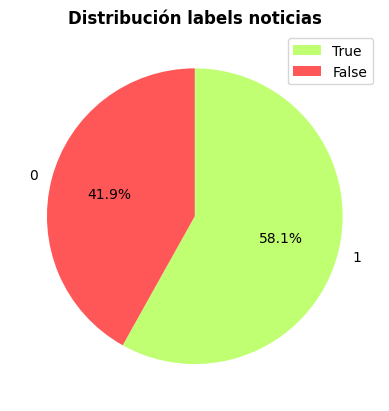

In [66]:
import matplotlib.pyplot as plt


# Plotting the value counts
label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False, colors=['#c1ff72', '#ff5757'])
plt.legend(['True', 'False'])
plt.title('Distribución labels noticias', fontweight='bold')
plt.ylabel('')
plt.show()


Hay 58% noticias verdaderas y 42% falsas. Esto es útil para analizar el balanceo de noticias antes del procesamiento de datos, se pueden tomar decisiones sobre técnicas de balanceo, como submuestreo o sobremuestreo, para evitar sesgos en el modelo y mejorar su capacidad de generalización. Esta prueba se realizó en el pre-procesamiento, y la diferencia no fue muy significativa


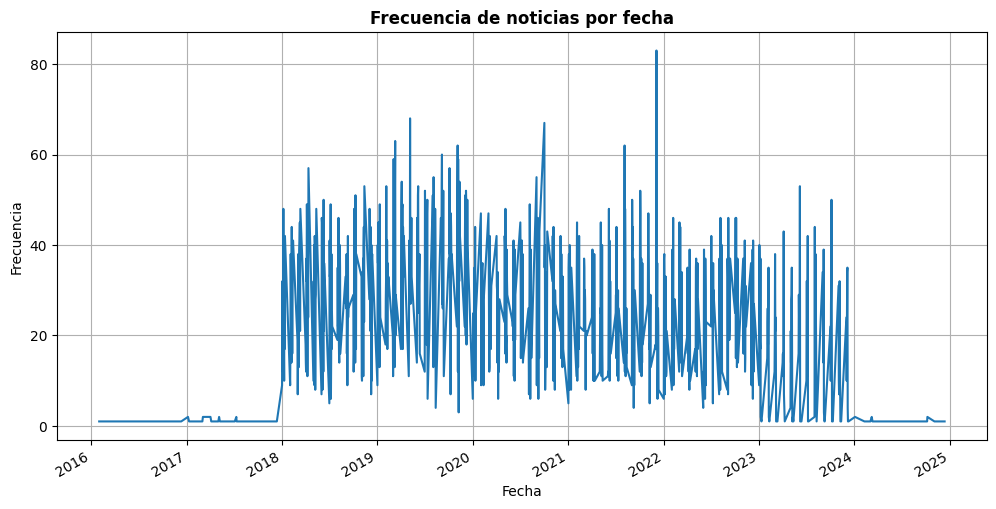

In [62]:
# Plotting the frequency of each date
conteo_fechas.plot(kind='line', figsize=(12, 6))
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.title('Frecuencia de noticias por fecha', fontweight='bold')
plt.show()

Esta gráfica muestra que la mayoría de las noticias están entre 2018 y 2024. Como la base de datos es de España, los datos de entrenamiento reflejan la situación política y social de ese período. Esto es importante porque, si el modelo se usa en el futuro, algunas palabras, como nombres de personas o partidos políticos, pueden no ser reconocidas correctamente debido al sesgo temporal en los datos de entrenamiento. Además, existe un sesgo geográfico, ya que el modelo ha sido entrenado principalmente con información de España.

Funciones útiles

In [26]:
# Convertir valores NaN a string vacío y forzar todo a tipo string
df["Titulo"] = df["Titulo"].fillna("").astype(str)
df["Descripcion"] = df["Descripcion"].fillna("").astype(str)

In [27]:
import pandas as pd
import unicodedata
import re
import inflect
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download("stopwords")
nltk.download("punkt")

def replace_numbers(text):
    """Reemplaza números con su representación textual."""
    p = inflect.engine()
    return re.sub(r'\b\d+\b', lambda x: p.number_to_words(x.group()), text)

def remove_stopwords(words):
    """Elimina las stopwords en español."""
    stop_words = set(stopwords.words("spanish"))
    return [word for word in words if word not in stop_words]

def remove_non_ascii(text):
    """Elimina tildes y caracteres no ASCII."""
    return unicodedata.normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

def to_lowercase(text):
    """Convierte todo a minúsculas."""
    return text.lower()

def remove_punctuation(text):
    """Elimina puntuación."""
    return re.sub(r"[^\w\s]", "", text)

def preprocessing(text):
    """Aplica todos los preprocesamientos antes de tokenizar."""
    text = to_lowercase(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = replace_numbers(text)
    return text

df_token = df.copy()
# Aplicar preprocesamiento antes de tokenizar
df_token["Titulo_pr"] = df_token["Titulo"].apply(preprocessing)
df_token["Descripcion_pr"] = df_token["Descripcion"].apply(preprocessing)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jenni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jenni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Ahora el título y descripción están en minusculas y sin tildes

In [28]:
df_token.head(3)

,ID,Label,Titulo,Descripcion,Fecha,Titulo_pr,Descripcion_pr
0,1,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,2023-02-06,the guardian va con sanchez europa necesita qu...,el diario britanico publico este pasado jueves...
1,2,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,2023-01-10,revelan que el gobierno negocio la liberacion ...,revelan que el gobierno negocio la liberacion ...
2,3,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,NaT,el ahora o nunca de joan fuster sobre el estat...,el valencianismo convoca en castello su fiesta...


## Tokenización

In [29]:
df_token['Titulo_tk'] = df_token['Titulo_pr'].apply(contractions.fix) #Aplica la corrección de las contracciones
df_token['Titulo_tk'] = df_token['Titulo_pr'].apply(word_tokenize)
df_token['Descripcion_tk'] = df_token['Descripcion_pr'].apply(contractions.fix) #Aplica la corrección de las contracciones
df_token['Descripcion_tk'] = df_token['Descripcion_pr'].apply(word_tokenize)

In [30]:
df_token.head(15)

,ID,Label,Titulo,Descripcion,Fecha,Titulo_pr,Descripcion_pr,Titulo_tk,Descripcion_tk
0,1,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,2023-02-06,the guardian va con sanchez europa necesita qu...,el diario britanico publico este pasado jueves...,"[the, guardian, va, con, sanchez, europa, nece...","[el, diario, britanico, publico, este, pasado,..."
1,2,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,2023-01-10,revelan que el gobierno negocio la liberacion ...,revelan que el gobierno negocio la liberacion ...,"[revelan, que, el, gobierno, negocio, la, libe...","[revelan, que, el, gobierno, negocio, la, libe..."
2,3,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,NaT,el ahora o nunca de joan fuster sobre el estat...,el valencianismo convoca en castello su fiesta...,"[el, ahora, o, nunca, de, joan, fuster, sobre,...","[el, valencianismo, convoca, en, castello, su,..."
3,4,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",2022-03-01,iglesias alienta a yolanda diaz erc y eh bildu...,en politica igual que hay que negociar con los...,"[iglesias, alienta, a, yolanda, diaz, erc, y, ...","[en, politica, igual, que, hay, que, negociar,..."
4,5,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",2018-09-03,puigdemont no seria ninguna tragedia una repet...,en una entrevista en el punt avui el lider de ...,"[puigdemont, no, seria, ninguna, tragedia, una...","[en, una, entrevista, en, el, punt, avui, el, ..."
5,6,1,"El PNV consolida su mayoría, el PSE salva los ...",Los nacionalistas consiguen las alcaldías de B...,NaT,el pnv consolida su mayoria el pse salva los p...,los nacionalistas consiguen las alcaldias de b...,"[el, pnv, consolida, su, mayoria, el, pse, sal...","[los, nacionalistas, consiguen, las, alcaldias..."
6,7,0,El exconsejero Núria Marín pide el indulto en ...,Sus familiares aluden a su honestidad e integr...,NaT,el exconsejero nuria marin pide el indulto en ...,sus familiares aluden a su honestidad e integr...,"[el, exconsejero, nuria, marin, pide, el, indu...","[sus, familiares, aluden, a, su, honestidad, e..."
7,8,1,La Fiscalía pide prisión incondicional para lo...,Suprime el delito de rebelión que les imputó i...,NaT,la fiscalia pide prision incondicional para lo...,suprime el delito de rebelion que les imputo i...,"[la, fiscalia, pide, prision, incondicional, p...","[suprime, el, delito, de, rebelion, que, les, ..."
8,9,1,"José Manuel Pérez Tornero, el creador de la te...",El futuro presidente de RTVE es licenciado en ...,NaT,jose manuel perez tornero el creador de la tel...,el futuro presidente de rtve es licenciado en ...,"[jose, manuel, perez, tornero, el, creador, de...","[el, futuro, presidente, de, rtve, es, licenci..."
9,10,0,La 'Ayusización' del BNG: Santiago Abascal ins...,Pablo Santiago Abascal planea vivir de las ren...,2021-10-05,la ayusizacion del bng santiago abascal instru...,pablo santiago abascal planea vivir de las ren...,"[la, ayusizacion, del, bng, santiago, abascal,...","[pablo, santiago, abascal, planea, vivir, de, ..."


## Normalización

In [31]:
nltk.download('wordnet')

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas


df_token["Titulo_tk"] = df_token["Titulo_tk"].apply(lemmatize_verbs)
df_token["Descripcion_tk"] = df_token["Descripcion_tk"].apply(lemmatize_verbs)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jenni\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
df_token.head(20)

,ID,Label,Titulo,Descripcion,Fecha,Titulo_pr,Descripcion_pr,Titulo_tk,Descripcion_tk
0,1,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,2023-02-06,the guardian va con sanchez europa necesita qu...,el diario britanico publico este pasado jueves...,"[the, guardian, va, con, sanchez, europa, nece...","[el, diario, britanico, publico, este, pasado,..."
1,2,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,2023-01-10,revelan que el gobierno negocio la liberacion ...,revelan que el gobierno negocio la liberacion ...,"[revelan, que, el, gobierno, negocio, la, libe...","[revelan, que, el, gobierno, negocio, la, libe..."
2,3,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,NaT,el ahora o nunca de joan fuster sobre el estat...,el valencianismo convoca en castello su fiesta...,"[el, ahora, o, nunca, de, joan, fuster, sobre,...","[el, valencianismo, convoca, en, castello, su,..."
3,4,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",2022-03-01,iglesias alienta a yolanda diaz erc y eh bildu...,en politica igual que hay que negociar con los...,"[iglesias, alienta, a, yolanda, diaz, erc, y, ...","[en, politica, igual, que, hay, que, negociar,..."
4,5,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",2018-09-03,puigdemont no seria ninguna tragedia una repet...,en una entrevista en el punt avui el lider de ...,"[puigdemont, no, seria, ninguna, tragedia, una...","[en, una, entrevista, en, el, punt, avui, el, ..."
5,6,1,"El PNV consolida su mayoría, el PSE salva los ...",Los nacionalistas consiguen las alcaldías de B...,NaT,el pnv consolida su mayoria el pse salva los p...,los nacionalistas consiguen las alcaldias de b...,"[el, pnv, consolida, su, mayoria, el, pse, sal...","[los, nacionalistas, consiguen, las, alcaldias..."
6,7,0,El exconsejero Núria Marín pide el indulto en ...,Sus familiares aluden a su honestidad e integr...,NaT,el exconsejero nuria marin pide el indulto en ...,sus familiares aluden a su honestidad e integr...,"[el, exconsejero, nuria, marin, pide, el, indu...","[sus, familiares, aluden, a, su, honestidad, e..."
7,8,1,La Fiscalía pide prisión incondicional para lo...,Suprime el delito de rebelión que les imputó i...,NaT,la fiscalia pide prision incondicional para lo...,suprime el delito de rebelion que les imputo i...,"[la, fiscalia, pide, prision, incondicional, p...","[suprime, el, delito, de, rebelion, que, les, ..."
8,9,1,"José Manuel Pérez Tornero, el creador de la te...",El futuro presidente de RTVE es licenciado en ...,NaT,jose manuel perez tornero el creador de la tel...,el futuro presidente de rtve es licenciado en ...,"[jose, manuel, perez, tornero, el, creador, de...","[el, futuro, presidente, de, rtve, es, licenci..."
9,10,0,La 'Ayusización' del BNG: Santiago Abascal ins...,Pablo Santiago Abascal planea vivir de las ren...,2021-10-05,la ayusizacion del bng santiago abascal instru...,pablo santiago abascal planea vivir de las ren...,"[la, ayusizacion, del, bng, santiago, abascal,...","[pablo, santiago, abascal, planea, vivir, de, ..."


## Selección de campos

In [33]:

df_token['Titulo_tk'] = df_token['Titulo_tk'].apply(lambda x: ' '.join(map(str, x)))
df_token['Descripcion_tk'] = df_token['Descripcion_tk'].apply(lambda x: ' '.join(map(str, x)))

In [34]:
df_token.head(5)

,ID,Label,Titulo,Descripcion,Fecha,Titulo_pr,Descripcion_pr,Titulo_tk,Descripcion_tk
0,1,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,2023-02-06,the guardian va con sanchez europa necesita qu...,el diario britanico publico este pasado jueves...,the guardian va con sanchez europa necesita qu...,el diario britanico publico este pasado jueves...
1,2,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,2023-01-10,revelan que el gobierno negocio la liberacion ...,revelan que el gobierno negocio la liberacion ...,revelan que el gobierno negocio la liberacion ...,revelan que el gobierno negocio la liberacion ...
2,3,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,NaT,el ahora o nunca de joan fuster sobre el estat...,el valencianismo convoca en castello su fiesta...,el ahora o nunca de joan fuster sobre el estat...,el valencianismo convoca en castello su fiesta...
3,4,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",2022-03-01,iglesias alienta a yolanda diaz erc y eh bildu...,en politica igual que hay que negociar con los...,iglesias alienta a yolanda diaz erc y eh bildu...,en politica igual que hay que negociar con los...
4,5,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",2018-09-03,puigdemont no seria ninguna tragedia una repet...,en una entrevista en el punt avui el lider de ...,puigdemont no seria ninguna tragedia una repet...,en una entrevista en el punt avui el lider de ...


In [35]:
df_token[["Titulo_tk", "Descripcion_tk"]]

,Titulo_tk,Descripcion_tk
0,the guardian va con sanchez europa necesita qu...,el diario britanico publico este pasado jueves...
1,revelan que el gobierno negocio la liberacion ...,revelan que el gobierno negocio la liberacion ...
2,el ahora o nunca de joan fuster sobre el estat...,el valencianismo convoca en castello su fiesta...
3,iglesias alienta a yolanda diaz erc y eh bildu...,en politica igual que hay que negociar con los...
4,puigdemont no seria ninguna tragedia una repet...,en una entrevista en el punt avui el lider de ...
...,...,...
57058,el defensor del pueblo reclama a la comunidad ...,el gobierno regional han indicado que la atenc...
57059,el equo plantea ceder la presidencia de la com...,si la higiene democratica nos lleva a esa exig...
57060,alberto garzon que los borbones son unos ladro...,el coordinador federal de iu asegura que la mo...
57061,vox exige entrar en el gobierno de castilla y ...,santiago abascal vox tiene el derecho y el deb...


## Función para evaluar los modelos

* Vamos a priorizar el recall

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay, recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

def evaluate_model(y_test, y_pred, labels, model_name):
    """
    Evalúa el rendimiento de un modelo de clasificación.

    Parámetros:
    - y_test: Valores reales de la clasificación.
    - y_pred: Predicciones del modelo.
    - model_name: Nombre del modelo para impresión (opcional).
    """
    print(f"\nEvaluación del modelo: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Recall:", recall_score(y_test,y_pred) ) # ESTA SERA LA METRICA PRINCIPAL
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Calcular F1 Score
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    f1_macro = f1_score(y_test, y_pred, average='macro')

    print(f"F1 Weighted Score: {f1_weighted}")
    print(f"F1 Macro Score: {f1_macro}")

    # Mostrar la matriz de confusión
    
    plt.figure()
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                                  display_labels=labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    #RocCurveDisplay.from_estimator(model_name, x_test, y_test)

print("a")


a


# Training

Para el proceso de entrenamiento del modelo, se utilizaron las columnas de título y descripción después de aplicar la tokenización. Durante las pruebas, investigamos que al sumar directamente los textos de ambas columnas antes de tokenizar, el desempeño de los modelos se veía afectado negativamente. Además al consultar con profesores confirmamos esto. Esto sugiere que la tokenización aplicada sobre los textos combinados no preservaba adecuadamente la estructura de la información, lo que generaba una perdida en la representación de los datos.

Para mitigar este efecto, en lugar de sumar los textos antes de la tokenización, optamos por tokenizar cada columna por separado y luego aplicar la vectorización a cada una. Finalmente, concatenamos las representaciones vectorizadas de ambas columnas, lo que permitió mejorar la calidad de los datos de entrada y optimizar el rendimiento del modelo.

In [37]:

X_train, X_test, y_train, y_test = train_test_split(
    df_token[["Titulo_tk", "Descripcion_tk"]],
    df_token["Label"],
    test_size=0.3,
    random_state=42
)

In [38]:
X_train.head(5)

,Titulo_tk,Descripcion_tk
45501,la demanda de corinna larsen contra juan carlo...,la examante del emerito saca a la venta la fin...
1284,alicante resurge el canton del sur que amenaza...,guinos y gestos simbolicos hacia las tierras a...
52810,pp y ciudadanos no dan ninguna entrevista a pu...,este diario ha solicitado entrevistas en base ...
48700,borrell tendra que esperar al menos un mes mas...,el ministro en funciones de asuntos exteriores...
40339,la ley de vivienda no sufrira ninguna modifica...,la ministra de derechos sociales ione albert n...


# Algoritmo Jenifer Arce

Seleccioné algoritmo Naive Bayes debido a que es muy utilizada en tareas de clasificación de texto y su capacidad para manejar grandes volúmenes de datos de manera eficiente. En el contexto de nuestro proyecto de detección de noticias falsas en política, este clasificador resulta útil porque permite asignar probabilidades a cada noticia en función de su contenido, determinando si es verdadera o falsa (IBM, s.f.). El modelo se basa en el Teorema de Bayes, el cual calcula la probabilidad de que una noticia pertenezca a una categoría dada la presencia de ciertas palabras en su texto. Su capacidad para detectar patrones lingüísticos comunes en noticias falsas nos permitirá analizar cómo ciertas palabra o fraspueden indicar una mayor probabilidad de desinformación.

Para entrenar el modelo, se utilizaron los títulos y descripciones de las noticias después de un proceso de preprocesamiento y vectorización, que se hizo previamente. Además de probar el texto con el vector TDIF, lo probé con vector de conteo:

* TF-IDF (Term Frequency-Inverse Document Frequency): Asigna más peso a las palabras importantes y reduce la influencia de las más comunes.
* Count Vectorization: Solo cuenta cuántas veces aparece cada palabra en el texto


## Detalles relevantes del algoritmo:
* Debido a su eficiencia computacional (IBM, s.f.)., Naive Bayes es una alternativa viable cuando se trabaja con grandes volúmenes de noticias en tiempo real. Lo que en el contexto del proyecto y el entendimiento del negocio, facilita la implementación de un sistema de detección rápido y con resultados interpretables para noticias.
* Si se usa count vectorizer el modelo se basa en la frecuencia de las palabras. Si se usa TF-IDF, el modelo considera la relevancia de cada término. 
* En las fuentes pueden encontrar las formulas del modelo. En general el funcionamiento se basa en aplicar el teorema de Bayes, donde la probabilidad posterior se obtiene multiplicando la probabilidad previa de la categoría P(y) (que es el label) por la probabilidad condicional de observar las palabras en esa categoria o clase P(X∣y). Luego, cada palabra que esté en el vectores, contribuye a la clasificación mediante P(x_i∣y), que se estima con suavizado de Laplace para evitar valores de probabilidad cero. Finalmente, el modelo predice el label y (1 o 0) maximizando la probabilidad P(y∣X), eligiendo la que tenga mayor valor entre las posibles opciones.

## Fórmulas:

Fuentes:

IBM. (s.f.). Naive Bayes. IBM. https://www.ibm.com/es-es/think/topics/naive-bayes


UpGrad. (2024, 19 noviembre). Multinomial naive Bayes explained: Function, advantages & disadvantages, applications. upGrad Blog. https://www.upgrad.com/blog/multinomial-naive-bayes-explained/

# Training con count vectorizer y tdif

# Intento modelo TD-IDF

In [39]:
import pandas as pd
from tkinter.constants import X
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Inicializar TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=4000)

# Vectorizar el título
X_train_tfidf_titulo = tfidf_vectorizer.fit_transform(X_train["Titulo_tk"])
X_test_tfidf_titulo = tfidf_vectorizer.transform(X_test["Titulo_tk"])

# Vectorizar la descripción
X_train_tfidf_descripcion = tfidf_vectorizer.fit_transform(X_train["Descripcion_tk"])
X_test_tfidf_descripcion = tfidf_vectorizer.transform(X_test["Descripcion_tk"])

# Mostrar información sobre las características
print(tfidf_vectorizer.get_feature_names_out())
print("num columnas:", len(tfidf_vectorizer.get_feature_names_out()))

# Convertir a DataFrame
columns = tfidf_vectorizer.get_feature_names_out()
df_train_titulo = pd.DataFrame(X_train_tfidf_titulo.toarray(), columns=columns)
df_train_descripcion = pd.DataFrame(X_train_tfidf_descripcion.toarray(), columns=columns)
df_test_titulo = pd.DataFrame(X_test_tfidf_titulo.toarray(), columns=columns)
df_test_descripcion = pd.DataFrame(X_test_tfidf_descripcion.toarray(), columns=columns)

# Concatenar los DataFrames
X_train_tfidf = pd.concat([df_train_titulo, df_train_descripcion], axis=1)
X_test_tfidf = pd.concat([df_test_titulo, df_test_descripcion], axis=1)

# Mostrar información final
print("columns after concat del X_train tfidf: ", X_train_tfidf.shape)
print("type after concat del X_train tfidf: ", type(X_train_tfidf), "// shape: ", X_train_tfidf.shape)
print("columns after concat del X_test tfidf: ", X_test_tfidf.columns)
print("type after concat del X_test tfidf: ", type(X_test_tfidf), "// shape: ", X_test_tfidf.shape)




['10n' '1o' '26m' ... 'zoido' 'zona' 'zonas']
num columnas: 4000
columns after concat del X_train tfidf:  (39944, 8000)
type after concat del X_train tfidf:  <class 'pandas.core.frame.DataFrame'> // shape:  (39944, 8000)
columns after concat del X_test tfidf:  Index(['10n', '1o', '26m', '28a', '28m', '4m', '8m', 'abalos', 'abandona',
       'abandonado',
       ...
       'yo', 'yolanda', 'york', 'zapatero', 'zaragoza', 'zarzalejos',
       'zarzuela', 'zoido', 'zona', 'zonas'],
      dtype='object', length=8000)
type after concat del X_test tfidf:  <class 'pandas.core.frame.DataFrame'> // shape:  (17119, 8000)



Evaluación del modelo: MultinomialNB con TF-IDF
Accuracy: 0.8703779426368362
Recall: 0.9583835946924005
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.75      0.83      7171
           1       0.84      0.96      0.90      9948

    accuracy                           0.87     17119
   macro avg       0.88      0.85      0.86     17119
weighted avg       0.88      0.87      0.87     17119

F1 Weighted Score: 0.867652004553772
F1 Macro Score: 0.8622099268710477


<Figure size 640x480 with 0 Axes>

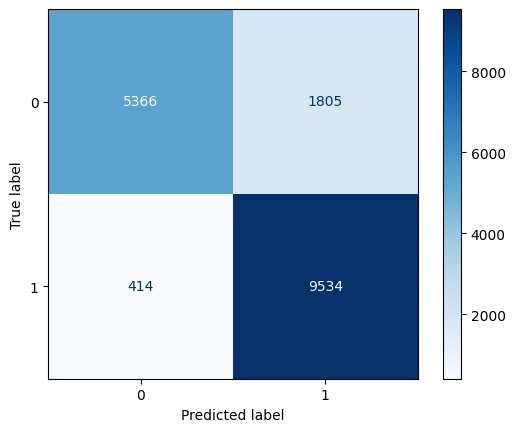

In [ ]:
x_train_MNB_tfidf = X_train_tfidf.copy()
x_test_MNB_tfidf = X_test_tfidf.copy()
y_train_MNB = y_train.reset_index(drop=True)
y_test_MNB = y_test.reset_index(drop=True)
model_tfidf = MultinomialNB()
model_tfidf.fit(x_train_MNB_tfidf, y_train_MNB)
y_pred_MNB_tfidf = model_tfidf.predict(x_test_MNB_tfidf)
evaluate_model(y_test_MNB, y_pred_MNB_tfidf, ["0", "1"], "Naive Bayes con TF-IDF")


El modelo basado en TF-IDF muestra un excelente desempeño, especialmente en la predicción del label 1, que es el más importante para mí. El recall para este label es de 0.96, lo que indica que el modelo captura casi todos los casos positivos, minimizando los falsos negativos. Además, el F1-score para el label 1 es de 0.90, lo que refleja un buen equilibrio entre precisión y recall. Esto significa que el modelo predice correctamente la mayoría de los casos positivos (noticias verdaderas). En general, estos resultados validan la efectividad del modelo con TF-IDF para el modelo, asegurando una identificación de noticias verdaderas, y también falsas.

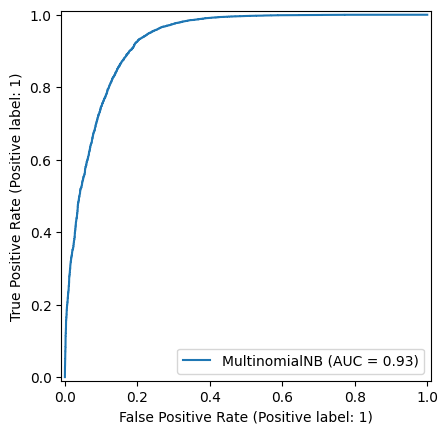

In [64]:
RocCurveDisplay.from_estimator(model_tfidf, x_test_MNB_tfidf, y_test_MNB)

Una gran fortaleza del modelo es su alta capacidad para diferenciar entre noticias verdaderas y falsas, como lo demuestra el AUC de 0.93 en la curva ROC. Esto indica que el modelo logra una excelente separación entre ambos labels, reduciendo significativamente los errores al clasificar noticias falsas como verdaderas. Esta precisión es clave para la detección de noticias falsas, ya que garantiza que la mayoría de las noticias identificadas como verdaderas realmente lo sean, fortaleciendo la confiabilidad del sistema.

## Count vectorizer

In [41]:
import pandas as pd
from tkinter.constants import X
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Inicializar CountVectorizer
vectorizer_count = CountVectorizer(max_features=4000)

# Vectorizar el título
X_train_title_vec = vectorizer_count.fit_transform(X_train["Titulo_tk"])
X_test_title_vec = vectorizer_count.transform(X_test["Titulo_tk"])

# Vectorizar la descripción
X_train_desc_vec = vectorizer_count.fit_transform(X_train["Descripcion_tk"])
X_test_desc_vec = vectorizer_count.transform(X_test["Descripcion_tk"])

# Mostrar información sobre las características
print(vectorizer_count.get_feature_names_out())
print("num columnas:", len(vectorizer_count.get_feature_names_out()))

# Convertir a DataFrame
columns = vectorizer_count.get_feature_names_out()
df_train_title = pd.DataFrame(X_train_title_vec.toarray(), columns=columns)
df_train_desc = pd.DataFrame(X_train_desc_vec.toarray(), columns=columns)
df_test_title = pd.DataFrame(X_test_title_vec.toarray(), columns=columns)
df_test_desc = pd.DataFrame(X_test_desc_vec.toarray(), columns=columns)

# Concatenar los DataFrames
X_train_vectorized = pd.concat([df_train_title, df_train_desc], axis=1)
X_test_vectorized = pd.concat([df_test_title, df_test_desc], axis=1)

# Mostrar información final
print("columns after concat del X_train vectorized: ", X_train_vectorized.shape)
print("type after concat del X_train vectorized: ", type(X_train_vectorized), "// shape: ", X_train_vectorized.shape)
print("columns after concat del X_test vectorized: ", X_test_vectorized.columns)
print("type after concat del X_test vectorized: ", type(X_test_vectorized), "// shape: ", X_test_vectorized.shape)


['10n' '1o' '26m' ... 'zoido' 'zona' 'zonas']
num columnas: 4000
columns after concat del X_train vectorized:  (39944, 8000)
type after concat del X_train vectorized:  <class 'pandas.core.frame.DataFrame'> // shape:  (39944, 8000)
columns after concat del X_test vectorized:  Index(['10n', '1o', '26m', '28a', '28m', '4m', '8m', 'abalos', 'abandona',
       'abandonado',
       ...
       'yo', 'yolanda', 'york', 'zapatero', 'zaragoza', 'zarzalejos',
       'zarzuela', 'zoido', 'zona', 'zonas'],
      dtype='object', length=8000)
type after concat del X_test vectorized:  <class 'pandas.core.frame.DataFrame'> // shape:  (17119, 8000)


In [42]:
y_train_MNB = y_train.reset_index(drop=True)
y_test_MNB = y_test.reset_index(drop=True)


Evaluación del modelo: Naive Bayes
Accuracy: 0.8800747707225889
Recall: 0.9387816646562123
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.80      0.85      7171
           1       0.87      0.94      0.90      9948

    accuracy                           0.88     17119
   macro avg       0.88      0.87      0.87     17119
weighted avg       0.88      0.88      0.88     17119

F1 Weighted Score: 0.8787830589341395
F1 Macro Score: 0.8744871503874042


<Figure size 640x480 with 0 Axes>

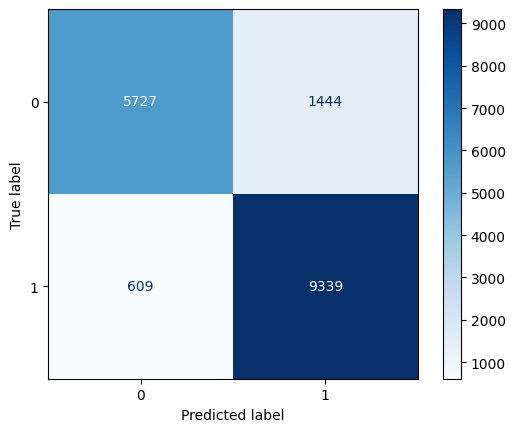

In [ ]:
x_train_MNB_count = X_train_vectorized.copy()
x_test_MNB_count = X_test_vectorized.copy()
model_count = MultinomialNB()
model_count.fit(x_train_MNB_count, y_train_MNB)
y_pred_MNB_count = model_count.predict(x_test_MNB_count)
evaluate_model(y_test_MNB, y_pred_MNB_count, ["0","1"], "Naive Bayes con CountVectorizer")

El modelo muestra un rendimiento sólido en la predicción de la clase 1, con un recall del X%, lo que indica que logra identificar la gran mayoría de los casos positivos (noticias verdaderas), minimizando los falsos negativos. Además, el F1-score para esta modelo es X, lo que confirma un buen balance entre precisión y recall. Esto significa que el modelo no solo detecta correctamente los casos positivos, sino que también lo hace con una alta precisión, garantizando predicciones confiables para el label que me interesa.

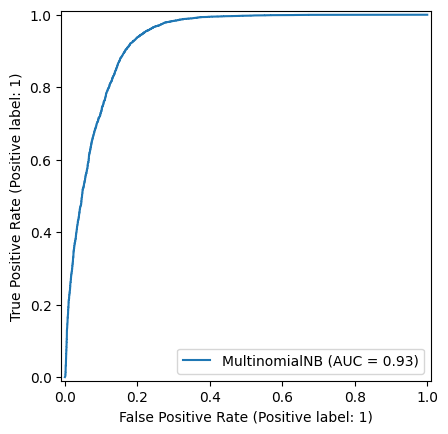

In [60]:
RocCurveDisplay.from_estimator(model_count, x_test_MNB_count, y_test_MNB)

La curva ROC muestra que el modelo tiene un excelente desempeño. La línea se acerca al vértice superior izquierdo, lo que indica una alta tasa de verdaderos positivos y una baja tasa de falsos positivos. El área bajo la curva (AUC = 0.93) confirma que el modelo distingue muy bien entre los labels, especialmente el label 1, que es el que me interesa predecir con precisión. Un AUC de 0.93 significa que, en el 93% de los casos, el modelo asigna una mayor probabilidad al label correcto en comparación con un incorrecto, lo que refuerza su efectividad.



Con el CountVectorizer es una manera efectiva de abordar el problema, y los resultados muestran un recall del 94% para el label 1, lo que significa que detecta correctamente la mayoría de las noticias que son verdaderas. Además, el F1-score de X indica un buen equilibrio entre precisión y recall. Comparado con el modelo basado en TF-IDF, la diferencia en rendimiento no es significativa, lo que sugiere que ambos enfoques son válidos para las necesidades de negocio que identificamos.

# Algoritmo marco y karen

In [ ]:
# TO DO